<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка дубликатов</a></span></li><li><span><a href="#Обработка-экстремальных-значений" data-toc-modified-id="Обработка-экстремальных-значений-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка экстремальных значений</a></span></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Корреляция признаков</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Кодирование категориальных признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Baseline model</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></div>

# Определение стоимости автомобилей

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

### Изучение данных

In [2]:
data = pd.read_csv('/datasets/autos.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


**Вывод**

Представлены данные, описывающие технические характеристики, комплектации и цены автомобилей. Присутствуют пропуски и экстремальные значения в данных.  
Целевой признак: Price — цена (евро).

### Обработка пропусков

In [5]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [6]:
data = data.fillna('unknown')

In [7]:
data.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

**Вывод**

Пропуски присутствуют только в категориальных переменных, достоверно заполнить  определенными значениями невозможно, заполнено как unknown.

### Проверка дубликатов

In [8]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 4


In [9]:
data[data.duplicated(keep=False)].sort_values(by='DateCrawled')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
88087,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
41529,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15
90964,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
187735,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54


In [10]:
data = data.drop_duplicates()
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


**Вывод**

Найденные дубликаты удалены.

### Обработка экстремальных значений

<function matplotlib.pyplot.show(*args, **kw)>

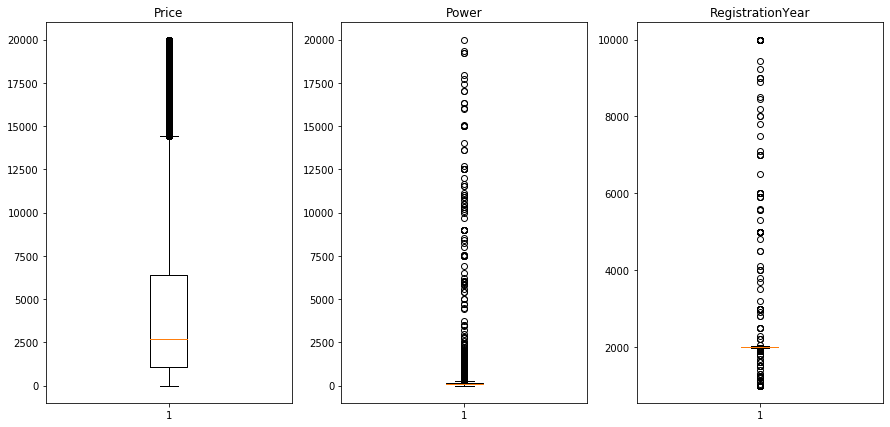

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))
axs[0].boxplot(data['Price'])
axs[1].boxplot(data['Power'])
axs[2].boxplot(data['RegistrationYear'])
axs[0].set_title('Price')
axs[1].set_title('Power')
axs[2].set_title('RegistrationYear')
plt.show

In [12]:
data[['Price', 'Power', 'RegistrationYear']].describe()

,Price,Power,RegistrationYear
count,354365.000000,354365.000000,354365.000000
mean,4416.679830,110.093816,2004.234481
std,4514.176349,189.851330,90.228466
min,0.000000,0.000000,1000.000000
25%,1050.000000,69.000000,1999.000000
50%,2700.000000,105.000000,2003.000000
75%,6400.000000,143.000000,2008.000000
max,20000.000000,20000.000000,9999.000000


*Price*

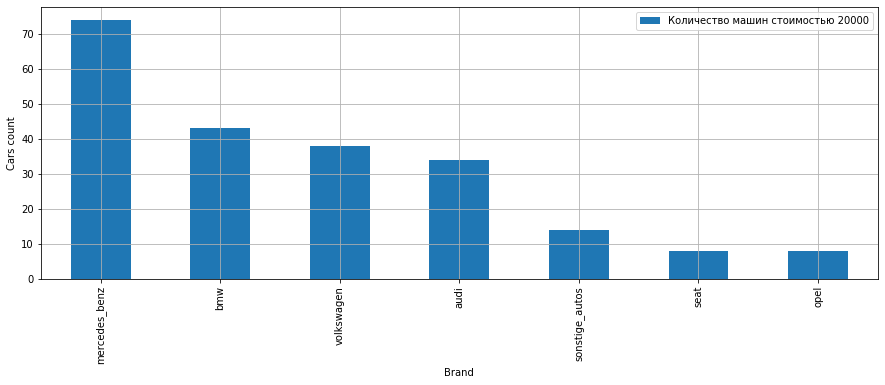

In [13]:
max_price = data[data['Price'] == 20000]
max_price[['Brand','VehicleType']].groupby(['Brand'])['VehicleType'] \
                             .count() \
                             .reset_index(name='count') \
                             .set_index('Brand') \
                             .sort_values(['count'], ascending=False) \
                             .head(7).plot(kind='bar', figsize=(15, 5), grid=True)
plt.legend(["Количество машин стоимостью 20000"])
plt.xlabel('Brand')
plt.ylabel('Cars count')
plt.show()

*Мощность*

In [14]:
print('Количество строк с указанной мощностью более 1479:')
print(data[data['Power'] > 1479]['Power'].count())

Количество строк с указанной мощностью более 1479:
207


In [15]:
data = data[data['Power'] < 1479]

*Год регистрации автомобиля*

In [16]:
pd.to_datetime(data['DateCreated'], format='%Y%').max()

Timestamp('2016-04-07 00:00:00')

In [17]:
print('Количество строк с указанным годом регистрации ранее 1970 и позднее 2016:')
print(data[(data['RegistrationYear'] > 2016)|(data['RegistrationYear'] < 1970)]['RegistrationYear'].count())

Количество строк с указанным годом регистрации ранее 1970 и позднее 2016:
15850


In [18]:
data = data[data['RegistrationYear'] <= 2016]
data = data[data['RegistrationYear'] >= 1970]

**Вывод**

Цена находится в рамках реальных значений брендов: https://www.statista.com/statistics/425240/eu-car-sales-average-prices-in-by-make/

Мощность более 1500 лошадиных сил невозможна, такие строки удалены. Самые мощные продаваемые автомобили ограничиваются 1479 лошадиной силой: https://www.topgear.com/car-news/mavericks/nine-of-the-most-powerful-production-cars-on-sale-today

Так как самая поздняя дата создания анкеты была в 2016,то автомобиль невозможно поставить в последующие годы. Самый ранний год постановки на учет выбран 1970, так как эти автомобили еще могут перепродаваться на вторичном рынке (например Honda Civic): https://www.motortrend.com/features/top-20-most-popular-used-cars-in-the-u-s/

### Корреляция признаков

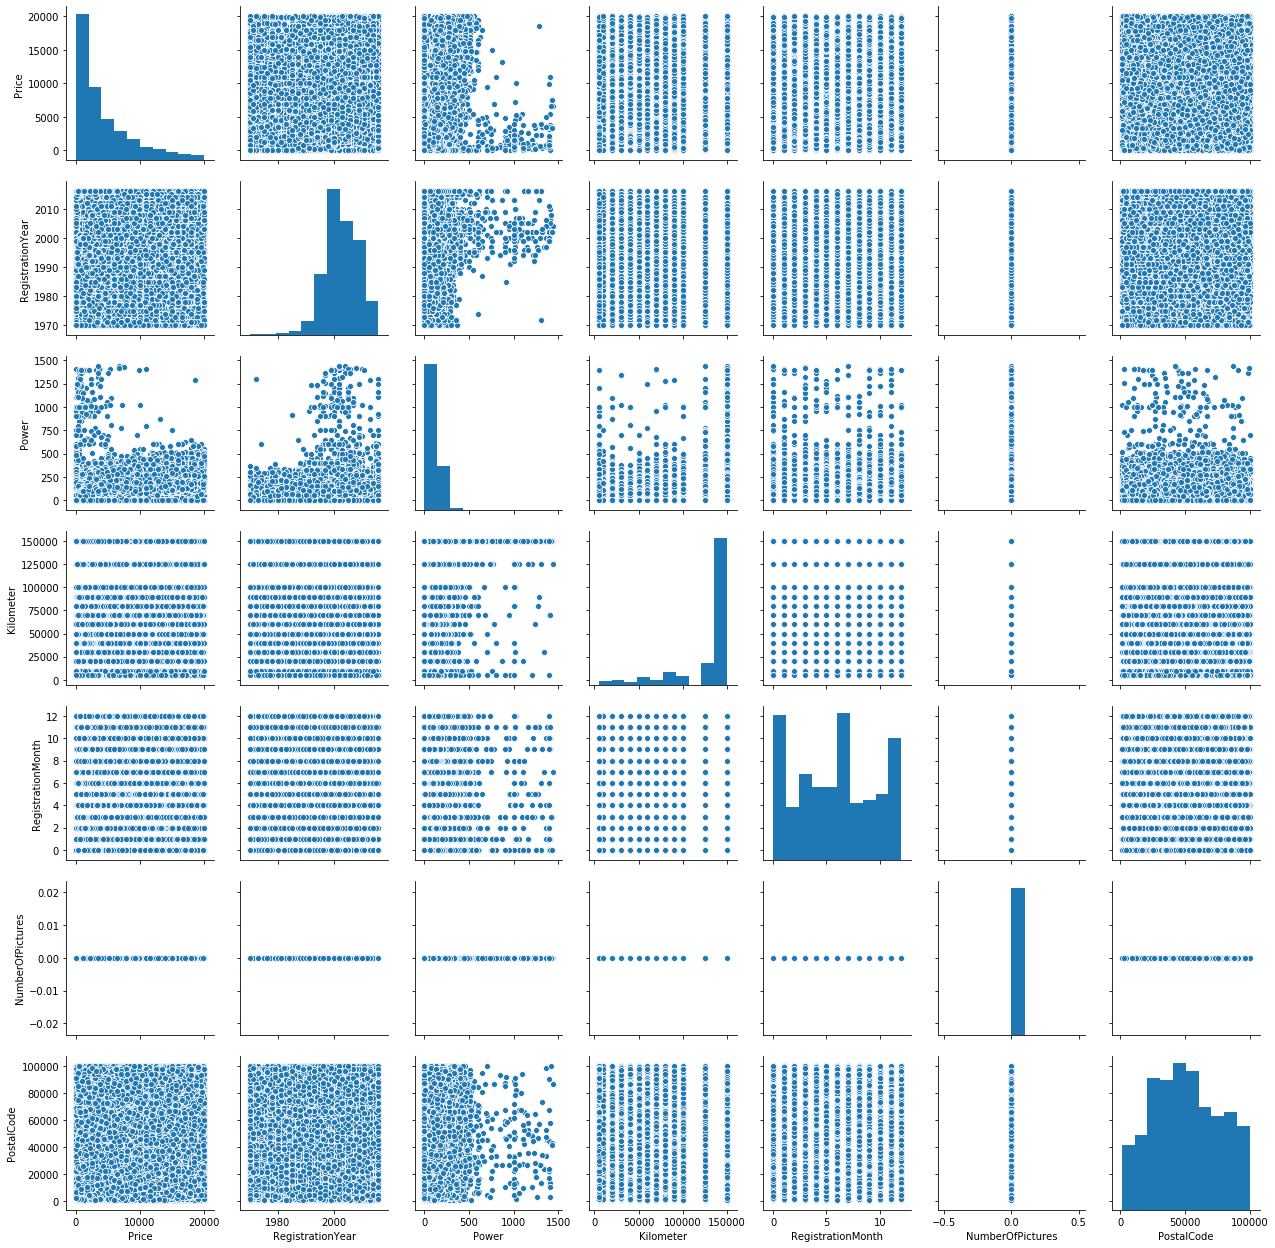

In [19]:
sns.pairplot(data)

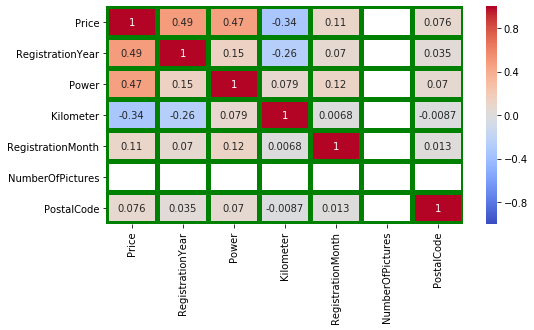

In [20]:
plt.figure(figsize=(8, 4))
sns.heatmap(data.corr(method='pearson'),
            annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=4, linecolor='green')
plt.show()

In [21]:
data['NumberOfPictures'].value_counts()

0    338308
Name: NumberOfPictures, dtype: int64

In [22]:
data = data.drop(['NumberOfPictures'], axis=1)

**Вывод**

В столбце NumberOfPictures одно значение во всем датасете. Удален, так как он будет только увеличивать время обучения моделей.  
Наблюдается небольшая корреляция между мощностью и стоимостью машины и годом регистрации.

### Масштабирование признаков

In [23]:
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'PostalCode', 'LastSeen'],
      dtype='object')

In [24]:
y = data['Price']
X = data.drop(['Price', 'DateCrawled', 'DateCreated',
               'PostalCode', 'LastSeen', 'RegistrationMonth'], axis=1)
X.head()

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,unknown,1993,manual,0,golf,150000,petrol,volkswagen,unknown
1,coupe,2011,manual,190,unknown,125000,gasoline,audi,yes
2,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,small,2008,manual,69,fabia,90000,gasoline,skoda,no


In [25]:
numeric_cols = ['Power', 'Kilometer', 'RegistrationYear']

scaler = StandardScaler()
scaler.fit(X[numeric_cols])
pd.options.mode.chained_assignment = None

X[numeric_cols] = scaler.transform(X[numeric_cols])
X.head()

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,unknown,-1.493208,manual,-1.635242,golf,0.576277,petrol,volkswagen,unknown
1,coupe,1.291212,manual,1.237539,unknown,-0.087180,gasoline,audi,yes
2,suv,0.208382,auto,0.829302,grand,-0.087180,gasoline,jeep,unknown
3,small,-0.255688,manual,-0.501249,golf,0.576277,petrol,volkswagen,no
4,small,0.827142,manual,-0.591969,fabia,-1.016020,gasoline,skoda,no


**Вывод**

Из признаков удалены столбцы, связанные с владельцем машины или месяцем ее постановки на учет:

* DateCrawled — дата скачивания анкеты из базы
* DateCreated — дата создания анкеты
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя
* RegistrationMonth — месяц регистрации автомобиля

Оставшиеся признаки масштабированны.

### Кодирование категориальных признаков

In [26]:
object_cols = X.select_dtypes('object').columns.tolist()
object_cols

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [27]:
X[object_cols].nunique().sort_values()

Gearbox          3
NotRepaired      3
FuelType         8
VehicleType      9
Brand           40
Model          251
dtype: int64

In [28]:
X[object_cols] = X[object_cols].astype('category')

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338308 entries, 0 to 354368
Data columns (total 9 columns):
VehicleType         338308 non-null category
RegistrationYear    338308 non-null float64
Gearbox             338308 non-null category
Power               338308 non-null float64
Model               338308 non-null category
Kilometer           338308 non-null float64
FuelType            338308 non-null category
Brand               338308 non-null category
NotRepaired         338308 non-null category
dtypes: category(6), float64(3)
memory usage: 22.6 MB


*One Hot Encoding*

In [30]:
cols_for_ohe = ['Gearbox', 'NotRepaired', 'FuelType', 'VehicleType']

X_ohe = pd.get_dummies(X, columns=cols_for_ohe, drop_first=True)

X_ohe.head()

,RegistrationYear,Power,Model,Kilometer,Brand,Gearbox_manual,Gearbox_unknown,NotRepaired_unknown,NotRepaired_yes,FuelType_electric,...,FuelType_petrol,FuelType_unknown,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_unknown,VehicleType_wagon
0,-1.493208,-1.635242,golf,0.576277,volkswagen,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1.291212,1.237539,unknown,-0.087180,audi,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.208382,0.829302,grand,-0.087180,jeep,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.255688,-0.501249,golf,0.576277,volkswagen,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.827142,-0.591969,fabia,-1.016020,skoda,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


*Label Encoding*

In [31]:
le_brand = preprocessing.LabelEncoder()
le_brand.fit(X_ohe['Brand'])
X_ohe['Brand'] = le_brand.transform(X_ohe['Brand'])

le_model = preprocessing.LabelEncoder()
le_model.fit(X_ohe['Model'])
X_ohe['Model'] = le_model.transform(X_ohe['Model'])

X_ohe.head()

,RegistrationYear,Power,Model,Kilometer,Brand,Gearbox_manual,Gearbox_unknown,NotRepaired_unknown,NotRepaired_yes,FuelType_electric,...,FuelType_petrol,FuelType_unknown,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_unknown,VehicleType_wagon
0,-1.493208,-1.635242,116,0.576277,38,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1.291212,1.237539,228,-0.087180,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.208382,0.829302,117,-0.087180,14,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.255688,-0.501249,116,0.576277,38,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.827142,-0.591969,101,-1.016020,31,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
y_ohe = y

**Вывод**

Для LightGBM модели признаки типа object переведены в category.  
Для линейной регрессии и модели случайного леса категориальные признаки закодированы с помощью One Hot Encoding для признаков с малым количеством вариантов и Label Encoding для признаков с большим количеством вариантов.

## Обучение моделей

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)

In [34]:
X_ohe_train, X_ohe_valid, y_ohe_train, y_ohe_valid = train_test_split(X_ohe, y_ohe, test_size=0.25, random_state=12345)

In [35]:
def feature_imp(model_attr, columns):
    importances = model_attr
    indices = np.argsort(importances)
    
    plt.figure(figsize=(10,7))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [columns[i] for i in indices])
    plt.grid()
    plt.show()

### LinearRegression

In [36]:
%%time

model_LR = LinearRegression(normalize=True, n_jobs=-1)
model_LR.fit(X_ohe_train, y_ohe_train)

CPU times: user 443 ms, sys: 116 ms, total: 560 ms
Wall time: 578 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [37]:
predicted_valid_lr = model_LR.predict(X_ohe_valid)
rmse_lr = mean_squared_error(y_ohe_valid, predicted_valid_lr) ** 0.5

print('RMSE:', rmse_lr)

RMSE: 2969.568402148194


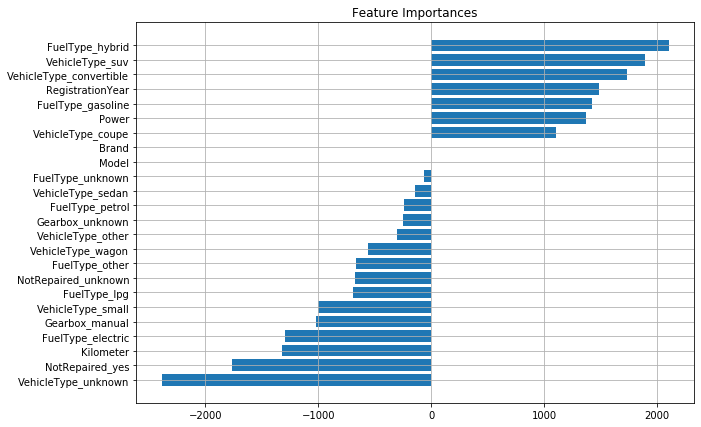

In [38]:
feature_imp(model_LR.coef_, X_ohe.columns)

**Вывод**

Линейная регрессия обучается очень быстро, но RMSE очень высокий.

### RandomForestRegressor

In [39]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [40]:
model_RF = RandomForestRegressor()
parametrs_RF = { 
                 'n_estimators': range(40, 51, 2),
                 'max_depth': range(10,21, 2),
                 'bootstrap': [True]
               }

In [41]:
grid_RF = GridSearchCV(model_RF, parametrs_RF, cv=5, scoring=mse_scorer, n_jobs=-1)

In [42]:
%%time

grid_RF.fit(X_ohe_train, y_ohe_train)
grid_RF.best_params_

CPU times: user 1h 42min 11s, sys: 21.2 s, total: 1h 42min 32s
Wall time: 1h 43min 14s


{'bootstrap': True, 'max_depth': 20, 'n_estimators': 48}

In [43]:
predicted_valid_rf = grid_RF.predict(X_ohe_valid)
rmse_rf = mean_squared_error(y_ohe_valid, predicted_valid_rf) ** 0.5

print('RMSE:', rmse_rf)

RMSE: 1670.2984622982672


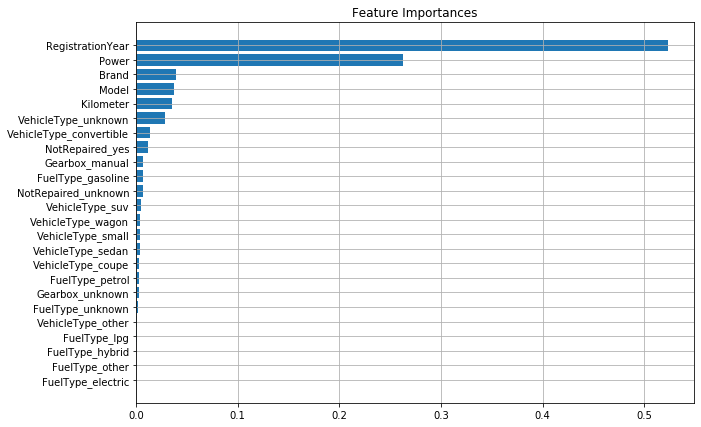

In [44]:
feature_imp(grid_RF.best_estimator_.feature_importances_, X_ohe.columns)

**Вывод**

Подбор параметров с помощью GridSearchCV и обучение модели случайного леса занимает большое количество времени, но RMSE лучше, чем у линейной регрессии.

### LightGBM 

In [45]:
params = {
    'task': 'train',
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    'learning_rate': 0.15,
    'verbose': 0,
    "max_depth": 6,
    "n_estimators": 5000,
    'num_leaves': 75,
    'random_state': 12345
    }

gbm = lgb.LGBMRegressor(**params, categorical_feature=object_cols)

In [46]:
%%time

gbm.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='l1')

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:842: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:863: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's l1: 3124.19	valid_0's l2: 1.61588e+07
[2]	valid_0's l1: 2779.37	valid_0's l2: 1.30403e+07
[3]	valid_0's l1: 2490.18	valid_0's l2: 1.07119e+07
[4]	valid_0's l1: 2253.08	valid_0's l2: 8.9926e+06
[5]	valid_0's l1: 2051.83	valid_0's l2: 7.65185e+06
[6]	valid_0's l1: 1884.67	valid_0's l2: 6.65775e+06
[7]	valid_0's l1: 1750.2	valid_0's l2: 5.90002e+06
[8]	valid_0's l1: 1635.87	valid_0's l2: 5.3184e+06
[9]	valid_0's l1: 1546.27	valid_0's l2: 4.87726e+06
[10]	valid_0's l1: 1465.37	valid_0's l2: 4.51428e+06
[11]	valid_0's l1: 1403	valid_0's l2: 4.24811e+06
[12]	valid_0's l1: 1350.56	valid_0's l2: 4.02586e+06
[13]	valid_0's l1: 1305.47	valid_0's l2: 3.85255e+06
[14]	valid_0's l1: 1268.48	valid_0's l2: 3.71349e+06
[15]	valid_0's l1: 1236.75	valid_0's l2: 3.59931e+06
[16]	valid_0's l1: 1210.66	valid_0's l2: 3.50767e+06
[17]	valid_0's l1: 1190.68	valid_0's l2: 3.43723e+06
[18]	valid_0's l1: 1171.3	valid_0's l2: 3.37153e+06
[19]	valid_0's l1: 1155.56	valid_0's l2: 3.31665e+06
[20]	vali

LGBMRegressor(boosting_type='gbdt',
              categorical_feature=['VehicleType', 'Gearbox', 'Model',
                                   'FuelType', 'Brand', 'NotRepaired'],
              class_weight=None, colsample_bytree=1.0, importance_type='split',
              learning_rate=0.15, max_depth=6, metric=['l1', 'l2'],
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=5000, n_jobs=-1, num_leaves=75,
              objective='regression', random_state=12345, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [47]:
predicted_valid_gbm = gbm.predict(X_valid, num_iteration=gbm.best_iteration_)
rmse_gbm = mean_squared_error(y_valid, predicted_valid_gbm) ** 0.5
print('RMSE:', rmse_gbm)

RMSE: 1632.2231330547347


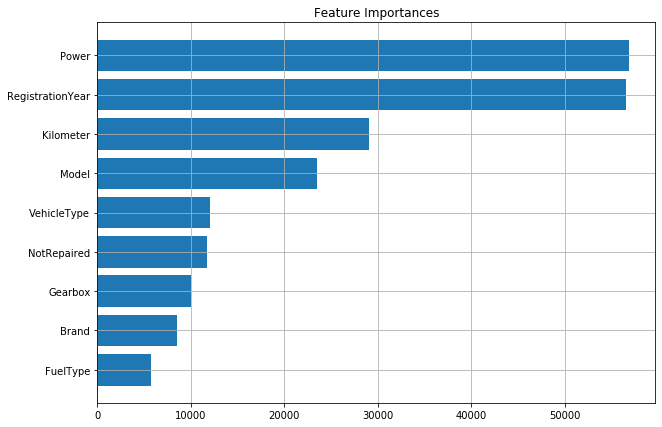

In [48]:
feature_imp(gbm.feature_importances_, X.columns)

**Вывод**

LightGBM обучается быстрее, чем RandomForestRegressor и ее предсказания более точны.

### CatBoostRegressor

In [49]:
model_cat = CatBoostRegressor(eval_metric='RMSE',
                              learning_rate=0.15,
                              verbose=0,
                              max_depth=6,
                              iterations=3000,
                              random_state=12345
                             )

In [50]:
%%time

model_cat.fit(X_train, y_train, cat_features=object_cols)

CPU times: user 41min 52s, sys: 3min 24s, total: 45min 16s
Wall time: 45min 22s


In [51]:
predicted_valid_cat = model_cat.predict(X_valid)
rmse_cat = mean_squared_error(y_valid, predicted_valid_cat) ** 0.5
print('RMSE:', rmse_cat)

RMSE: 1627.4010795859215


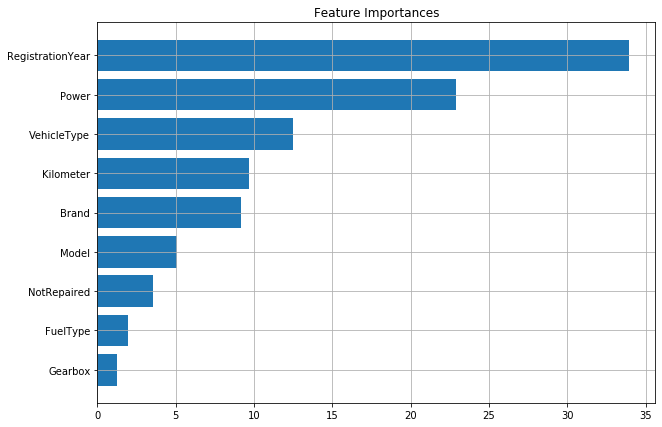

In [52]:
feature_imp(model_cat.feature_importances_, X.columns)

**Вывод**

Предсказания чуть лучше, чем у LightGBM модели, обучается в несколько раз дольше, однако быстрее чем RandomForestRegressor.

### Baseline model

In [53]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
predicted_dummy = dummy_regr.predict(X_valid)
rmse_dummy = mean_squared_error(y_valid, predicted_dummy) ** 0.5
print('RMSE:', rmse_dummy)

RMSE: 4521.016783965062


**Вывод**

Все 4 модели показывают лучший результат, чем дамми модель.

## Анализ моделей

In [54]:
overall = pd.DataFrame({
    'model': ['LinearRegression', 'RandomForestRegressor', 'LightGBM', 'CatBoostRegressor'], 
    'RMSE': [rmse_lr, rmse_rf, rmse_gbm, rmse_cat], 
    'time (min)': [0.01, 105, 11, 45],
})
overall.sort_values(by='RMSE')

,model,RMSE,time (min)
3,CatBoostRegressor,1627.401080,45.00
2,LightGBM,1632.223133,11.00
1,RandomForestRegressor,1670.298462,105.00
0,LinearRegression,2969.568402,0.01


*График остатков регрессии*

In [55]:
residuals_lr = y_ohe_valid-predicted_valid_lr
residuals_rf = y_ohe_valid-predicted_valid_rf
residuals_gbm = y_valid-predicted_valid_gbm
residuals_cat = y_valid-predicted_valid_cat

<function matplotlib.pyplot.show(*args, **kw)>

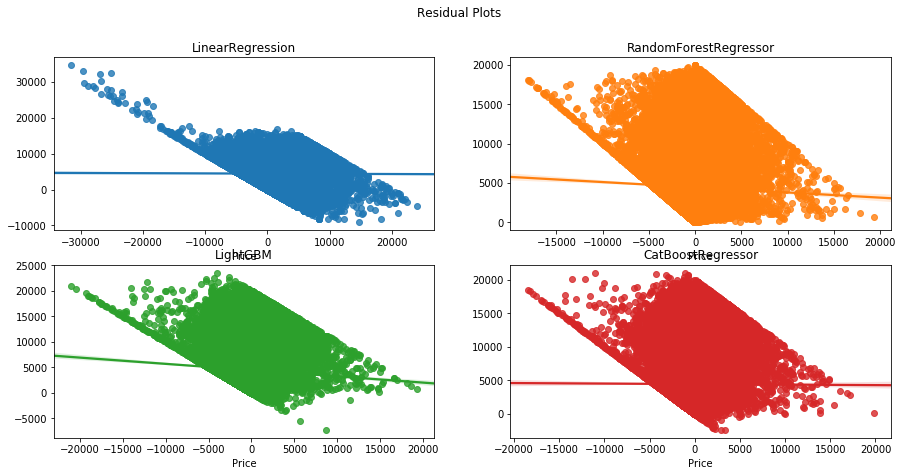

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
fig.suptitle('Residual Plots')

sns.regplot(x=residuals_lr, y=predicted_valid_lr, ax=axes[0, 0])
sns.regplot(x=residuals_rf, y=predicted_valid_rf, ax=axes[0, 1])
sns.regplot(x=residuals_gbm, y=predicted_valid_gbm, ax=axes[1, 0])
sns.regplot(x=residuals_cat, y=predicted_valid_cat, ax=axes[1, 1])

axes[0, 0].set_title('LinearRegression')
axes[0, 1].set_title('RandomForestRegressor')
axes[1, 0].set_title('LightGBM')
axes[1, 1].set_title('CatBoostRegressor')
plt.show

**Вывод**

Предсказания CatBoostRegressor и LightGBM оказались более точными, чем у остальных моделей. LightGBM обучилась в 4 раза быстрее чем CatBoostRegressor.
Дольше всего обучалась RandomForestRegressor с подбором параметров с помощью GridSearchCV. Предсказания хуже, чем у моделей градиентного бустинга.